In [1]:
from scipy.integrate import odeint 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math as math
import sympy as sym
import matplotlib.pyplot as plt
import time

sym.init_printing()

Defino el paso del método de euler

In [2]:
def step(u, v, p, q, h):
    du = p
    dv = q
    dp = -2 * v / (u*u + v*v + 1) * p * q
    dq = -2 * u / (u*u + v*v + 1) * p * q
    
    u = u + h * du
    v = v + h * dv
    p = p + h * dp
    q = q + h * dq
    
    return u, v, p, q

La función `euler` devuelve `steps` de paso `h` utilizando como condiciones inciales la tupla `y0` de la forma `(u,v,p,q)`

In [3]:
def euler(y0, steps, h):
    values = [y0]

    for i in range(steps):
        values.append(step(*values[i], h))
    
    return values

# Compute steps

La función `plot_euler_curves` renderiza las geodésicas calculadas por la función `euler` para cada uno de los valores iniciales en `curves`. Se calculan `steps` pasos de largo `h`

In [4]:
def plot_euler_curves(curves, steps, h):
    
    computedGeodesics = []

    for y0 in curves:  
        computedGeodesics.append(euler(y0, steps, h))
   
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = np.multiply(X,Y)

    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5)
    ax.set_zlim(-25, 25)

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    for geodesic in computedGeodesics:

        geodesic = [(u,v,p,q) for (u,v,p,q) in geodesic if abs(u) <= 5 and abs(v) <= 5]

        Gu = [u for (u,v,p,q) in geodesic]
        Gv = [v for (u,v,p,q) in geodesic]
        Gz = [u*v for (u,v,p,q) in geodesic]

        ax.plot(Gv, Gu, Gz)

    plt.show()


<IPython.core.display.Javascript object>


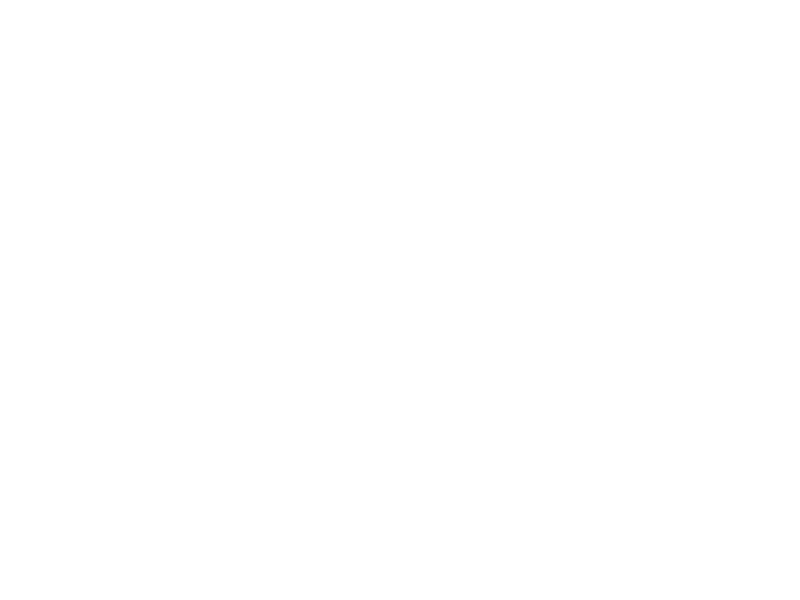

In [5]:
curves = [(1,-1, 1/math.sqrt(2), 1/math.sqrt(2)),
          (1,-1, -1/math.sqrt(2), 1/math.sqrt(2)),
          (1,-1, 1/math.sqrt(2), -1/math.sqrt(2)),
          (1,-1, -1/math.sqrt(2), -1/math.sqrt(2))]

%matplotlib notebook
plot_euler_curves(curves, 1000, 0.01)

# Solution

Función que calcula las derivadas `y'` dado `y` y `t`. Empleado por `sympy`.

In [6]:
def geodesic(y,t):
    return [
        y[2],
        y[3],
        -2*y[1]/(y[0]**2+y[1]**2+1)*y[2]*y[3],
        -2*y[0]/(y[0]**2+y[1]**2+1)*y[2]*y[3]
    ]

`get_error` calcula el error entre el método de euler y la solución de `scipy` a cada paso de largo `h` durante `steps` pasos

In [7]:
def get_error(initial_value, h, steps):

    t = [h*i for i in range(steps + 1)]

    expected, info = odeint(geodesic, initial_value, t, full_output=True)
    
    euler_values = euler(initial_value, steps, h)
    
    error = []
    for i, v1 in enumerate(euler_values):
        v2 = expected[i]
        error.append(math.sqrt((v2[0]-v1[0])**2+(v2[1]-v1[1])**2))
        
    return (t, error)

Ploteo a el error para diferentes `h` durante un mismo recorrido

<IPython.core.display.Javascript object>


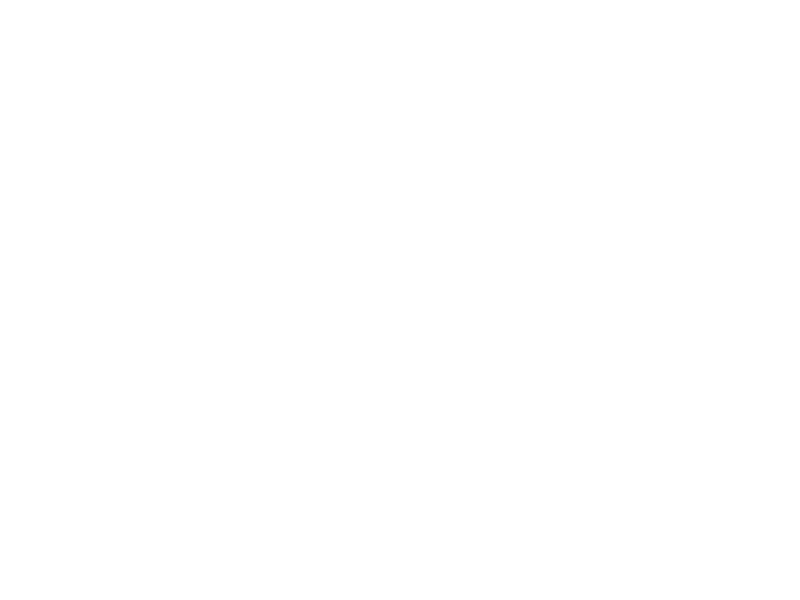

In [8]:
%matplotlib notebook

i = (1,3,1/math.sqrt(2),1/math.sqrt(2))
h_to_try = [0.0001, 0.001, 0.01, 0.05]
limit = 50

for h in h_to_try:
    t, error = get_error(i, h, (int)(limit/h))
    plt.plot(t, error, label="h=" + str(h))
    
plt.xlabel("paso * h")
plt.ylabel("error")
plt.legend()
plt.show()

Ploteo el error en el último paso contra `h` luego de un mismo recorrido

<IPython.core.display.Javascript object>


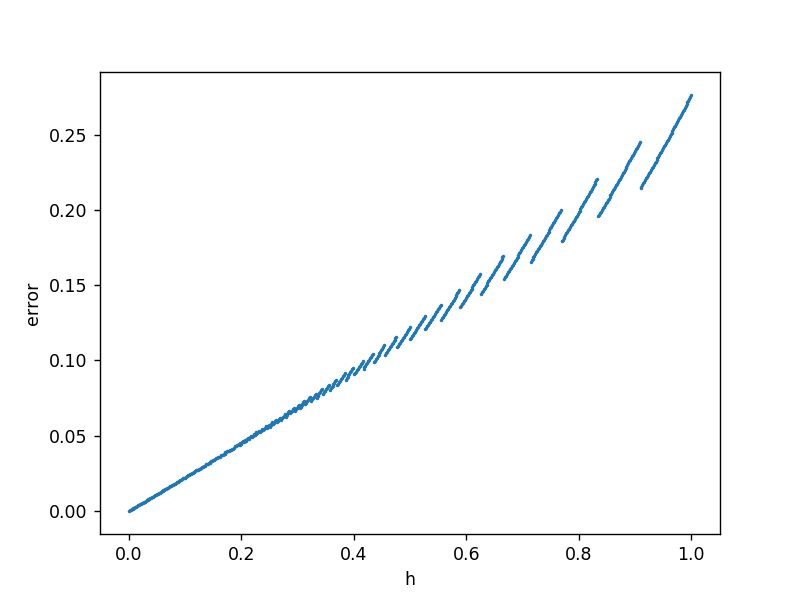

In [9]:
%matplotlib notebook

h_space = np.linspace(0.00001, 1, 600)
limit = 10
error_h = [get_error(i, h, (int)(limit/h))[1][-1] for h in h_space]

plt.xlabel("h")
plt.ylabel("error")

plt.scatter(h_space, error_h, s=1)
plt.show()

Renderizo curvas cálculadas con el método de euler con diferente `h` y la calculada con `odeint`

<IPython.core.display.Javascript object>


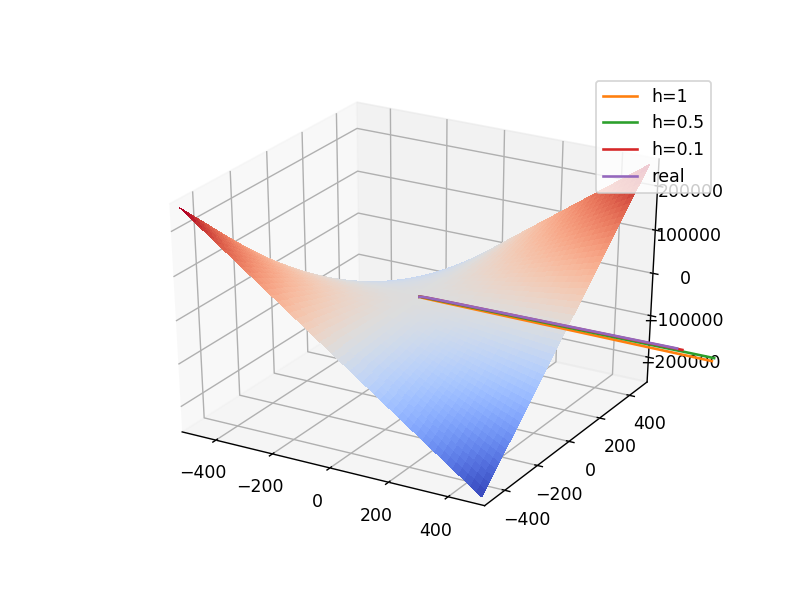

In [10]:
initial_value = (1,3,3,3)

fig = plt.figure()
ax = fig.gca(projection='3d')

limit = 500

X = np.arange(-limit, limit, 0.1)
Y = np.arange(-limit, limit, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.multiply(X,Y)

ax.set_ylim(-limit, limit)
ax.set_xlim(-limit, limit)
ax.set_zlim(-limit**2, limit**2)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
t = np.arange(0, limit, 0.1)

expected, info = odeint(geodesic, initial_value, t, full_output=True)

h_to_try = [1, 0.5, 0.1]

for h in h_to_try:
    euler_values = euler(initial_value, (int)(limit/h), h)
    Gu = [u for (u,v,p,q) in euler_values]
    Gv = [v for (u,v,p,q) in euler_values]
    Gz = [u*v for (u,v,p,q) in euler_values]
    ax.plot(Gv, Gu, Gz, label="h="+str(h))

Xu = [u for (u,v,p,q) in expected]
Xv = [v for (u,v,p,q) in expected]
Xz = [u*v for (u,v,p,q) in expected]
ax.plot(Xv, Xu, Xz, label="real")

ax.legend()

plt.show()


In [11]:
def get_time(initial_value, h, steps):

    t = [h*i for i in range(steps + 1)]
    
    
    start_time = time.time()
    expected, info = odeint(geodesic, initial_value, t, full_output=True)
    scipy_time = time.time() - start_time
        
    start_time = time.time()
    euler_values = euler(initial_value, steps, h)
    euler_time = time.time() - start_time
    
    return scipy_time, euler_time


<IPython.core.display.Javascript object>


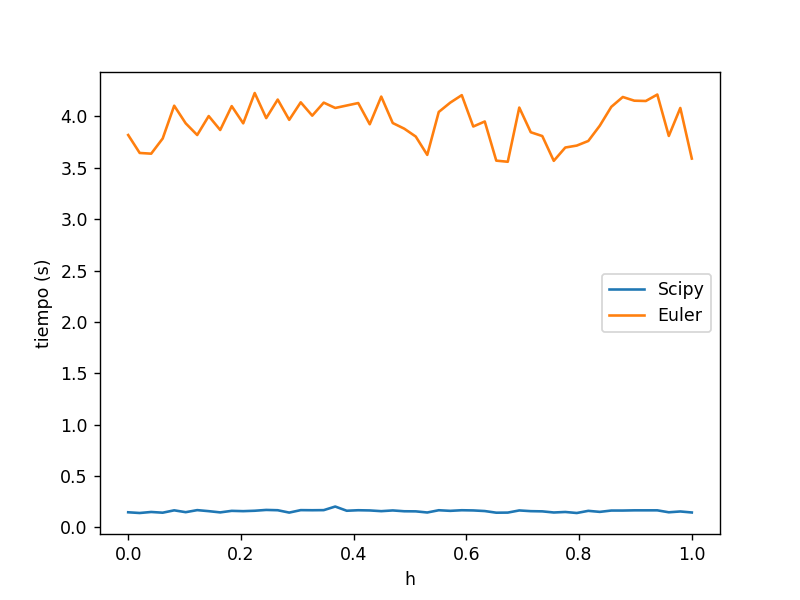

In [13]:
%matplotlib notebook

i = (1,3,1/math.sqrt(2),1/math.sqrt(2))
h_space = np.linspace(0.000001, 1, 50)
t = [get_time(i, h,1000000) for h in h_space]

scipy_time, euler_time = zip(*t)

plt.plot(h_space, scipy_time, label="Scipy")
plt.plot(h_space, euler_time, label="Euler")

plt.xlabel("h")
plt.ylabel("tiempo (s)")

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


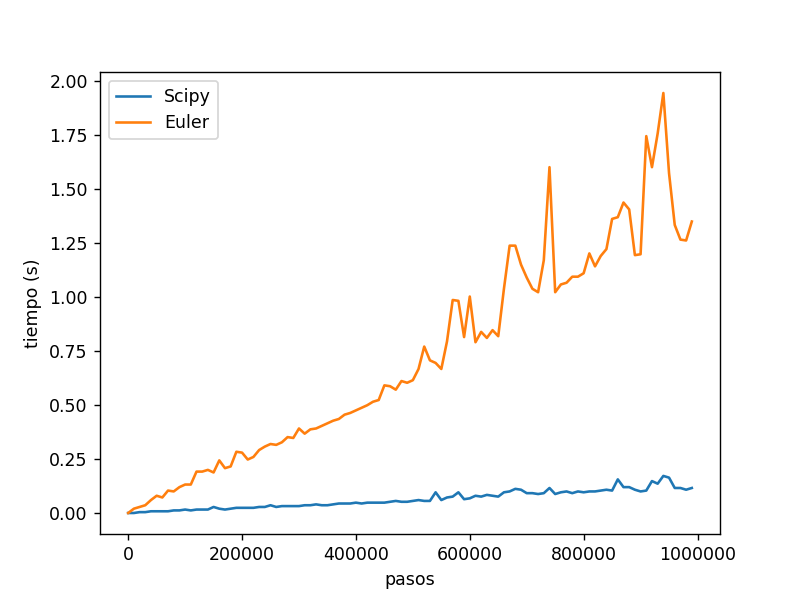

In [15]:
%matplotlib notebook

i = (1,3,1/math.sqrt(2),1/math.sqrt(2))
step_space = range(1, 1000000, 10000)
t = [get_time(i, 0.01, steps) for steps in step_space]

scipy_time, euler_time = zip(*t)

plt.plot(step_space, scipy_time, label="Scipy")
plt.plot(step_space, euler_time, label="Euler")

plt.xlabel("pasos")
plt.ylabel("tiempo (s)")

plt.legend()
plt.show()